In [23]:
import numpy as np

# 1-1-1-1 Checking point 1) Write a Python function lennard_jones(r, epsilon=0.01, sigma=3.4) that takes the distance r between two Ar atoms and returns the potential energy V (r) using the Lennard-Jones formula.
def lennard_jones(r, epsilon=0.01, sigma=3.4):
    # Calculate the Lennard-Jones potential using the formula
    potential = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return potential

# Test the function with an example value of r
r_test = 4.0  # example interatomic distance in Angstroms
potential_test = lennard_jones(r_test)

potential_test

-0.009396310339553115

In [24]:
# 1-1-1-2. Checking point 1) Use scipy.optimize.minimize to find the distance between two Ar atoms that minimizes the Lennard-Jones potential
# import scipy.optimize.minimize to find roots by minimizing the absolute value of a function
from scipy.optimize import minimize

# Define the function to optimize (minimize)
def lennard_jones_minimize(r, epsilon=0.01, sigma=3.4):
    # Since minimize works with scalar functions, we return only the potential energy
    return lennard_jones(r[0], epsilon, sigma)

# 1-1-1-2. Checking point 2) Start with an initial guess of r = 4  ̊A.
initial_guess = [4.0]  # Starting with r = 4 Å

# Perform the optimization
result = minimize(lennard_jones_minimize, initial_guess, bounds=[(0.1, None)])  # Setting lower bound for r (lower bound set at 0.1 (to avoid non-physical values such as zero or negative distances)

# Optimized distance
optimized_distance = result.x[0]
optimized_potential = lennard_jones(optimized_distance)

print(optimized_distance, optimized_potential)

3.816382885151206 -0.009999999996487553


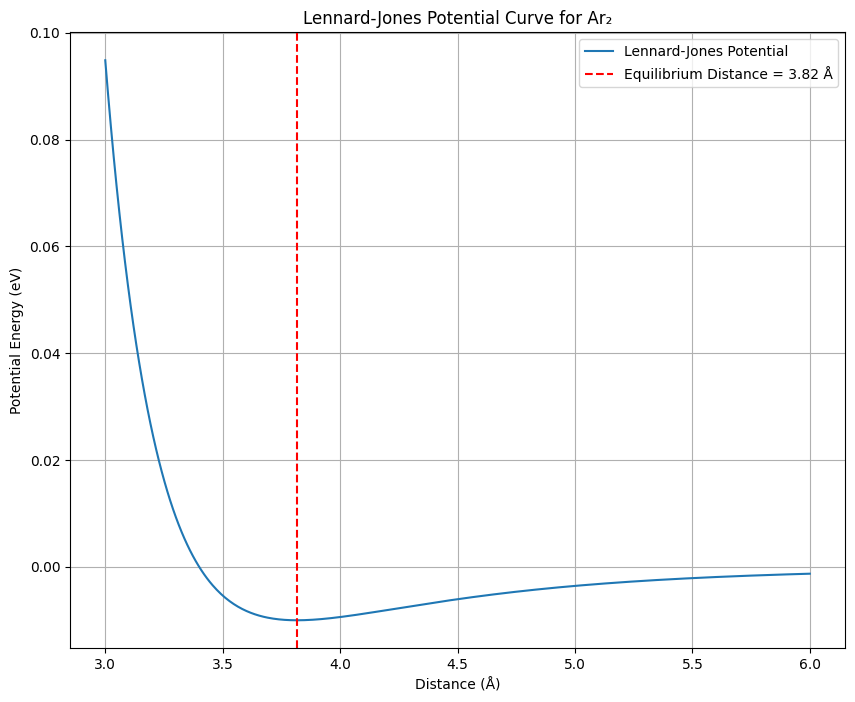

In [25]:
import matplotlib.pyplot as plt

# 1-1-1-3. Checking point 1) Plot the Lennard-Jones potential V (r) as a function of the distance r between 3  ̊A ≤ r ≤ 6  ̊A
r_values = np.linspace(3, 6, 500)

# Calculate Lennard-Jones potential for each distance
potential_values = [lennard_jones(r) for r in r_values]

# 1-1-1-3. Checking point 2) Mark the equilibrium distance (i.e., the distance at the minimum potential) on the plot.
plt.figure(figsize=(10, 8))
plt.plot(r_values, potential_values, label='Lennard-Jones Potential')
plt.axvline(x=optimized_distance, color='r', linestyle='--', label=f'Equilibrium Distance = {optimized_distance:.2f} Å')

# Add labels and title
plt.xlabel('Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Lennard-Jones Potential Curve for Ar₂')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [26]:
# 1-1-2-1. checkpoint 1) The total potential energy of Ar3 is the sum of the Lennard-Jones interactions between all three pairs of atoms
def total_potential_energy(r12, r13, r23, epsilon=0.01, sigma=3.4):
    # Calculate the Lennard-Jones potential for each pair of distances
    V12 = lennard_jones(r12, epsilon, sigma)
    V13 = lennard_jones(r13, epsilon, sigma)
    V23 = lennard_jones(r23, epsilon, sigma)
    
    # Total potential energy is the sum of the potentials for each pair
    
    return V12 + V13 + V23

In [34]:
# 1-1-2-2. checkpoint 1) Use scipy.optimize.minimize to find the optimal geometry of Ar3. Represent the positions of the three Ar atoms in two dimensions:
from scipy.optimize import minimize

# Redefine the Lennard-Jones potential
def lennard_jones(r, epsilon=0.01, sigma=3.4):
    potential = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return potential

# Using compute_bond_length function from Homework 1
def compute_bond_length(coord1, coord2):
    """
    Compute the bond length between two atoms using the Cartesian coordinates.
    
    parameters
    :coord1: List of [x, y, z] coordinates of the first atom.
    :coord2: List of [x, y, z] coordinates of the second atom.
    :return: The bond length between the two atoms.
    """
    # Calculate the bond length using the distance formula
    bond_length = np.sqrt((coord2[0] - coord1[0])**2 + 
                          (coord2[1] - coord1[1])**2)
    
    return bond_length

# Define the total potential energy in terms of r12, x3, and y3
def total_potential_energy_trimer(variables, epsilon=0.01, sigma=3.4):
    r12 = variables[0]  # distance between atom 1 and atom 2
    x3 = variables[1]   # x-coordinate of atom 3
    y3 = variables[2]   # y-coordinate of atom 3

    # Positions of the three atoms in 2D
    atom1 = [0, 0]  # 1-1-2-2. checkpoint 2) The first Atom is fixed at the origin
    atom2 = [r12, 0]  # 1-1-2-2. checkpoint 3) The second Atom is placed on the x-axis at (r12, 0).
    atom3 = [x3, y3]  # 1-1-2-2. checkpoint 4) atom’s position is (x3, y3), where both x3 and y3 are variables to be optimized.

    # Compute bond lengths using the bond length function
    r12 = compute_bond_length(atom1, atom2)  # Bond length between atom 1 and atom 2
    r13 = compute_bond_length(atom1, atom3)  # Bond length between atom 1 and atom 3
    r23 = compute_bond_length(atom2, atom3)  # Bond length between atom 2 and atom 3

    return total_potential_energy(r12, r13, r23, epsilon, sigma)

# Initial guess for the trimer geometry [r12, x3, y3]
initial_guess_trimer = [4.0, 4.0, 4.0]

# Optimize the total potential energy of the trimer
result_trimer = minimize(total_potential_energy_trimer, initial_guess_trimer, bounds=[(3.0, 6.0), (0, 6.0), (0, 6.0)]) # the bound range was decided based on the previous problem condition (3 ~ 6 A)

# Extract optimized results
optimized_r12, optimized_x3, optimized_y3 = result_trimer.x
optimized_total_energy = total_potential_energy_trimer([optimized_r12, optimized_x3, optimized_y3])

print(optimized_r12, optimized_x3, optimized_y3, optimized_total_energy)
print(f"Optimized vector for Ar3:")
print(f"(0, 0, 0): (0, 0, 0)")
print(f"(r12, 0, 0): ({optimized_r12:.2f}, 0, 0)")
print(f"(x3, y3, 0): ({optimized_x3:.2f}, {optimized_y3:.2f}, 0)")

3.8164027584606814 1.9082450054712572 3.3050343553208577 -0.0299999999166093
Optimized vector for Ar3:
(0, 0, 0): (0, 0, 0)
(r12, 0, 0): (3.82, 0, 0)
(x3, y3, 0): (1.91, 3.31, 0)


In [28]:
# defining compute_bond_angle from Homework 1
def compute_bond_angle(coord1, coord2, coord3):
    """
    Compute the bond angle between three atoms using their Cartesian coordinates.
    
    Parameters
    :coord1: List of [x, y] coordinates of the first atom.
    :coord2: List of [x, y] coordinates of the second atom.
    :coord3: List of [x, y] coordinates of the third atom.
    :return: The bond angle in degrees.
    """
    # Create vectors AB and BC
    AB = np.array(coord1) - np.array(coord2)
    BC = np.array(coord3) - np.array(coord2)
    
    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(AB, BC)
    magnitude_AB = np.linalg.norm(AB)
    magnitude_BC = np.linalg.norm(BC)
    
    # Compute the cosine of the angle using the dot product formula
    cos_theta = dot_product / (magnitude_AB * magnitude_BC)
    
    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to handle numerical errors
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg

In [29]:
import math

# Define the atom coordinates based on the optimized values
def get_atom_coordinates(optimized_r12, optimized_x3, optimized_y3):
    atom1 = [0, 0]  # Atom 1 is at the origin
    atom2 = [optimized_r12, 0]  # Atom 2 is on the x-axis at (r12, 0)
    atom3 = [optimized_x3, optimized_y3]  # Atom 3 at (x3, y3)
    return atom1, atom2, atom3

# define coordinate of atom1, atom2, and atom3
atom1, atom2, atom3 = get_atom_coordinates(optimized_r12, optimized_x3, optimized_y3)

# Use the optimized values to compute distances and angles
r12 = compute_bond_length(atom1, atom2)
r13 = compute_bond_length(atom1, atom3)
r23 = compute_bond_length(atom2, atom3)

angle_123 = compute_bond_angle(atom1, atom2, atom3)
angle_132 = compute_bond_angle(atom1, atom3, atom2)
angle_213 = compute_bond_angle(atom2, atom1, atom3)

# 1-1-2-3. checkpoint 1) Print the optimal distances r12, r13, r23 between the atoms in the trimer.
print(f"Optimal distances between atoms in Ar3:")
print(f"r12 (distance between atom 1 and 2): {r12:.2f} Å")
print(f"r13 (distance between atom 1 and 3): {r13:.2f} Å")
print(f"r23 (distance between atom 2 and 3): {r23:.2f} Å")

# 1-1-2-3. checkpoint 2) Print the optimal angles between the atoms in the trimer.
print(f"\nOptimal angles between atoms in Ar3:")
print(f"Angle at atom 2 (∠123): {angle_123:.2f} degrees")
print(f"Angle at atom 3 (∠132): {angle_132:.2f} degrees")
print(f"Angle at atom 1 (∠213): {angle_213:.2f} degrees")

# 1-1-2-3. checkpoint 3)Comment on the geometric arrangement
is_equilateral = (np.isclose(r12, r13, atol=0.01) and np.isclose(r13, r23, atol=0.01))
geometry_comment = "The atoms form an equilateral triangle." if is_equilateral else "The atoms do not form an equilateral triangle."
print(f"\nGeometric arrangement: {geometry_comment}")

Optimal distances between atoms in Ar3:
r12 (distance between atom 1 and 2): 3.82 Å
r13 (distance between atom 1 and 3): 3.82 Å
r23 (distance between atom 2 and 3): 3.82 Å

Optimal angles between atoms in Ar3:
Angle at atom 2 (∠123): 60.00 degrees
Angle at atom 3 (∠132): 60.00 degrees
Angle at atom 1 (∠213): 60.00 degrees

Geometric arrangement: The atoms form an equilateral triangle.


In [30]:
import os

# Define the local path to the directory where the file will be saved
directory_path = os.path.join("C:/Users/khh38/Desktop/PhD/Class/Class [2024 Fall]/Computational-chemistry/comp-prob-solv", "homework-2-1")

# Define a function to write the XYZ file with the optimized geometry
def write_xyz_file(file_path, atom1, atom2, atom3):
    """
    Write the atom coordinates to an .xyz file.
    
    :file_path: Full path to the .xyz file
    :atom1, atom2, atom3: Coordinates of the three Argon atoms
    """
    with open(file_path, 'w') as f:
        f.write(f"3\n")  # Number of atoms
        f.write(f"Argon trimer geometry\n")  # Comment line
        f.write(f"Ar {atom1[0]:.4f} {atom1[1]:.4f} 0.0000\n")  # Atom 1 with z=0 for 2D
        f.write(f"Ar {atom2[0]:.4f} {atom2[1]:.4f} 0.0000\n")  # Atom 2 with z=0 for 2D
        f.write(f"Ar {atom3[0]:.4f} {atom3[1]:.4f} 0.0000\n")  # Atom 3 with z=0 for 2D

# Coordinates of the three Argon atoms after optimization (replace with your optimized values)
def get_atom_coordinates(optimized_r12, optimized_x3, optimized_y3):
    atom1 = [0, 0]  # Atom 1 is at the origin
    atom2 = [optimized_r12, 0]  # Atom 2 is on the x-axis at (r12, 0)
    atom3 = [optimized_x3, optimized_y3]  # Atom 3 at (x3, y3)
    return atom1, atom2, atom3

# Get the coordinates for the three Argon atoms
atom1, atom2, atom3 = get_atom_coordinates(optimized_r12, optimized_x3, optimized_y3)

# Define the path to the .xyz file inside the homework-2-1 directory
xyz_file_path = os.path.join(directory_path, "argon_trimer_geometry.xyz")

# Write the XYZ file
write_xyz_file(xyz_file_path, atom1, atom2, atom3)

print(f"XYZ file written to {xyz_file_path}")

XYZ file written to C:/Users/khh38/Desktop/PhD/Class/Class [2024 Fall]/Computational-chemistry/comp-prob-solv\homework-2-1\argon_trimer_geometry.xyz
